In [16]:
selected_datasets = ['FreeSolv',
                        'ESOL',
                         'qm7',
                        'Lipo',
                        'BACE',
                        'BBBP',
                        'sider',
                        'tox21']

In [17]:
selected_datasets_lower = [x.lower() for x in selected_datasets]

In [18]:
file = 'Recon+predict_acc.py'

In [19]:
base_path = '/tf/MolCLR-master - copy2/experiments'

## pretrained_gin_sider_scaffold__random_maskingRecon+predict_acc.py

In [28]:
import os
import pandas as pd 

results_df = pd.DataFrame()  # 결과를 저장할 빈 데이터 프레임 생성

for dataset in selected_datasets_lower:
    file_name = 'pretrained_gin_{}_scaffold__random_masking{}.csv'.format(dataset,file)
    file_path = os.path.join(base_path ,file_name)
    
    
    if os.path.isfile(file_path):
        print(file_path)
        
        temp_df  = pd.read_csv(file_path)

        grouped = temp_df.groupby('mask_rate')['result_node'].agg(['mean', 'std']).reset_index()
        
        grouped['Dataset'] = dataset
        
        # 결과 데이터 프레임에 추가
        results_df = pd.concat([results_df, grouped], ignore_index=True)
    else:
        print(f"{file_path} 파일이 존재하지 않습니다.")

# 결과 데이터 프레임의 열 이름 변경
results_df.columns = ['mask_rate', 'Mean Result', 'Stddev Result', 'Dataset']

# 최종 결과 출력
print(results_df)

/tf/MolCLR-master - copy2/experiments/pretrained_gin_freesolv_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_esol_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_qm7_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_lipo_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_bace_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_bbbp_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_sider_scaffold__random_maskingRecon+predict_acc.py.csv
/tf/MolCLR-master - copy2/experiments/pretrained_gin_tox21_scaffold__random_maskingRecon+predict_acc.py.csv
    mask_rate  Mean Result  Stddev Result   Dataset
0         0.1     0.604598       0.074867  freesolv
1         0.3     0.551364       0.

In [29]:
df = pd.DataFrame(results_df)

In [13]:
# # 데이터셋이 'lipo'인 데이터만 그룹화
# for name, group in df[df['Dataset'] == 'lipo'].groupby('Dataset'):
#     plt.figure(figsize=(10, 6))
#     plt.plot(group['mask_rate'], group['Mean Result'], marker='o', markersize=10, )  # 정확도 데이터는 'acc'로 가정
#     # plt.title(f'Accuracy by Mask Rate for {name}')
#     plt.xlabel('Mask Rate' , fontsize=14)
#     plt.ylabel('Accuracy', fontsize=14)

#     # y축의 범위 설정, 예를 들어 0.85에서 0.95로 설정
#     plt.ylim(0.555, 0.59)

#     # 가로선만 있는 그리드 표시
#     plt.grid(True, axis='y')  

#         # 각 데이터 포인트에 값을 표시
#     for x, y in zip(group['mask_rate'], group['Mean Result']):
#         plt.text(x, y+0.002, f'{y:.3f}', color='black', ha='center', va='top')  # 값은 소수점 둘째자리까지 표시

#     # 그림 저장하기
#     plt.savefig(f"./{name}_plot.png", dpi=600, bbox_inches='tight')  # 파일 형식, 해상도 및 경계 조정 옵션 포함

#     plt.show()


NameError: name 'plt' is not defined

bace
bbbp
esol
freesolv
lipo
qm7
sider
tox21


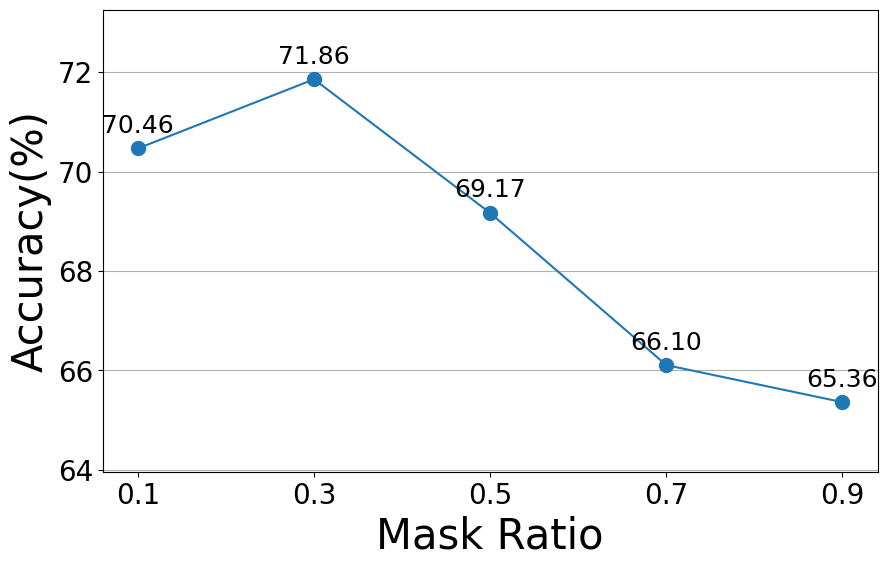

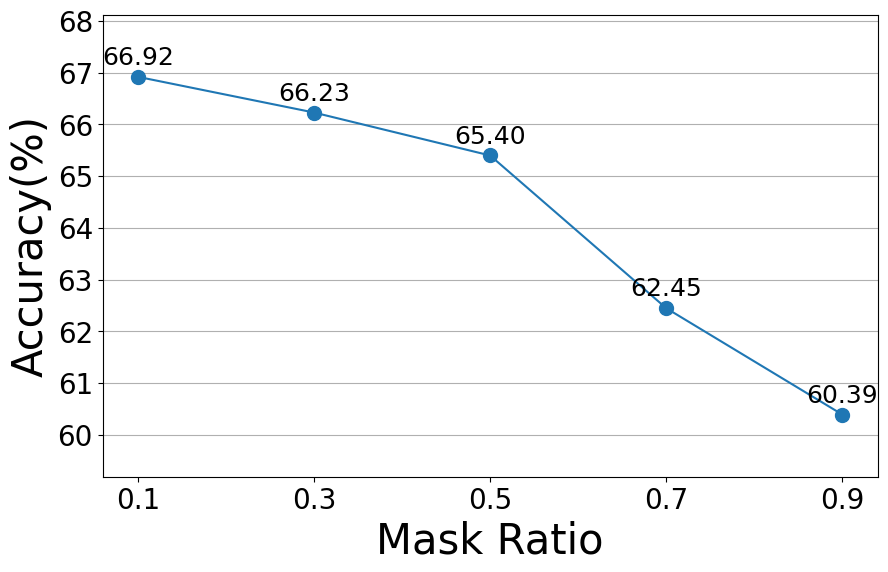

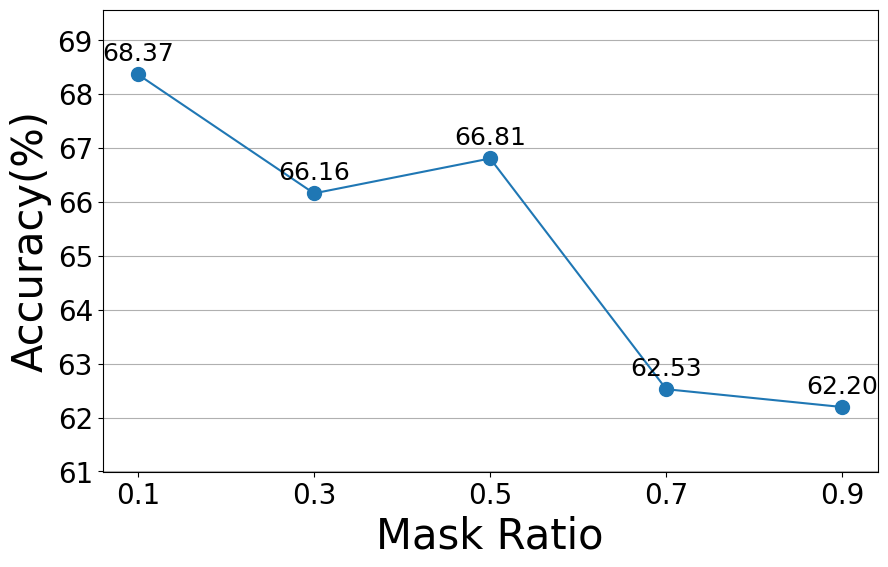

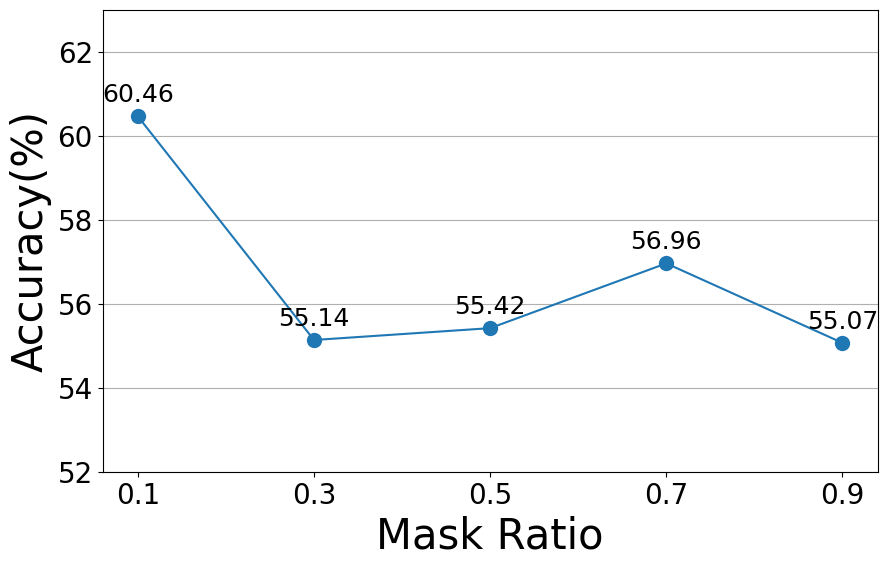

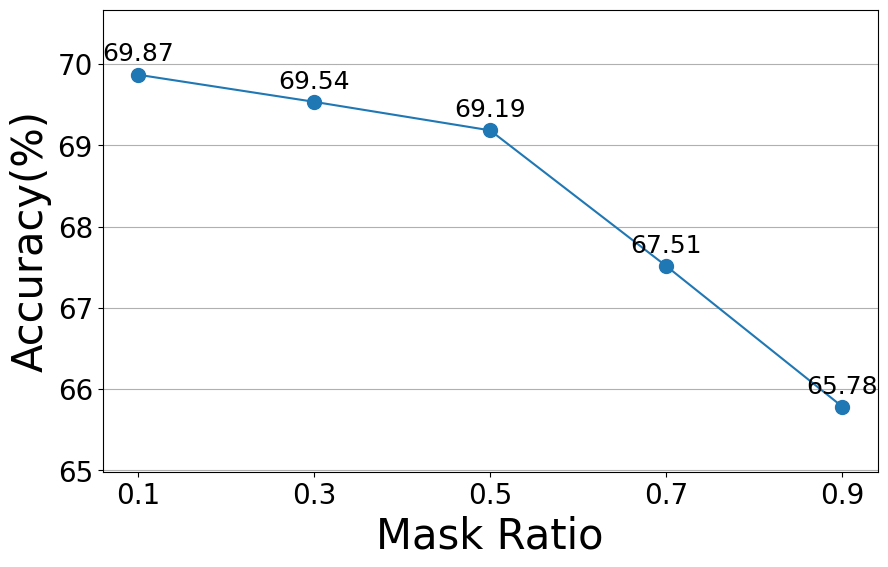

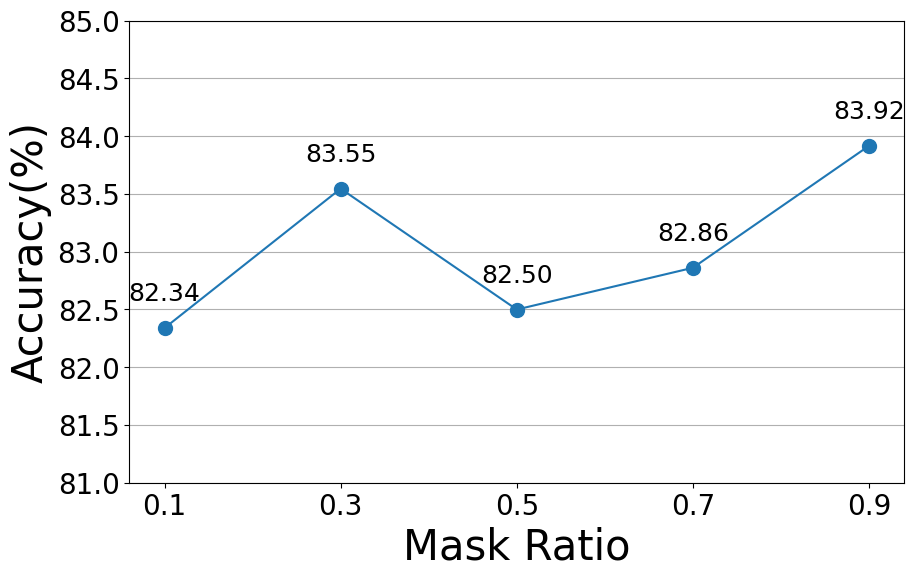

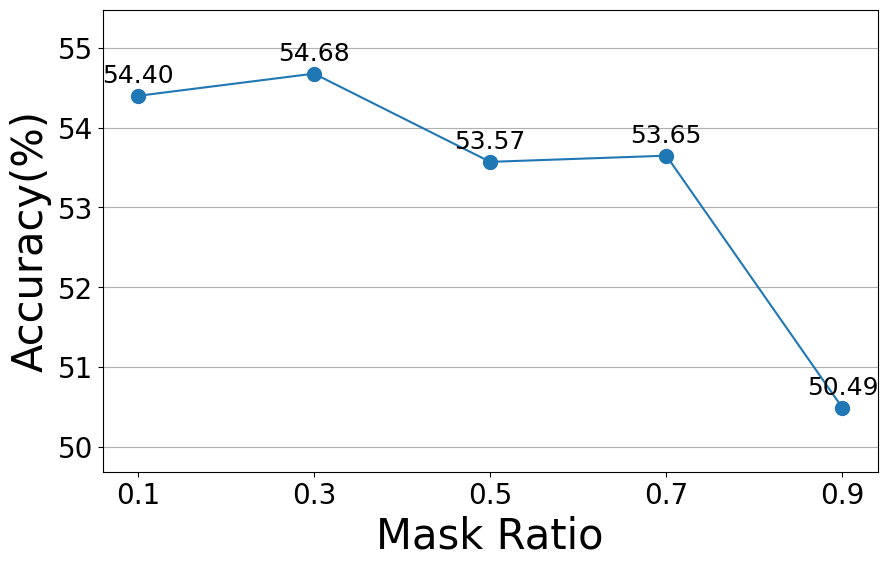

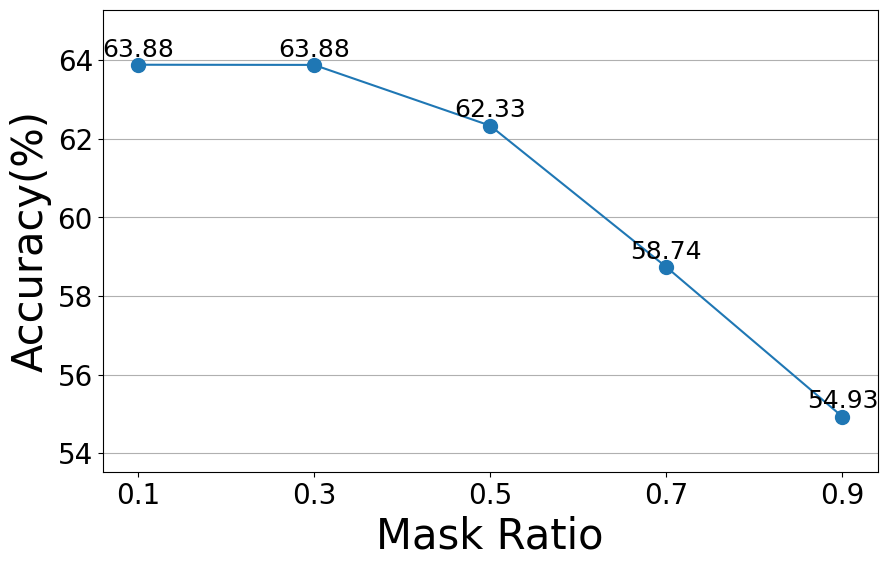

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results_df)
# 그룹화하여 각 데이터셋에 대한 꺾은선 그래프 그리기
for name, group in df.groupby('Dataset'):
    print(name)
    plt.figure(figsize=(10, 6))
    y_value = group['Mean Result'] * 100
    plt.plot(group['mask_rate'], y_value, marker='o', markersize=10)
    # plt.title(f'Mean Result by Mask Rate for {name}')
    plt.xlabel('Mask Ratio',fontsize= 30)
    plt.ylabel('Accuracy(%)', fontsize= 30)

    add_y = { 'bace': 0.7, 'bbbp': 0.6 , 'freesolv':0.8, 'esol': 0.6, 'lipo': 0.4 , 'qm7': 0.4,  'sider':0.4,  'tox21':0.2, 'tox21': 0.7, }
    
    for x, y in zip(group['mask_rate'], y_value):
        # plt.text(x, y+add_y[name], f'{y:.3f}', color='black', ha='center', va='top', size = 15)  # 값은 소수점 둘째자리까지 표시
        plt.text(x, y + add_y[name], f'{y:.2f}' , color='black', ha='center', va='top', size = 18)  # 값은 소수점 둘째자리까지 표시
        

    if name == 'qm7':
        y_min = 81
        y_max = 85

    elif name == 'freesolv':
        y_min = 52
        y_max = 63

    else:
    # y축 범위 설정
        y_min = y_value.min() - add_y[name] * 2
        y_max = y_value.max() + add_y[name] * 2
    plt.ylim(y_min, y_max)


    plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], fontsize=20)
    plt.yticks(fontsize = 20)

        # 가로선만 있는 그리드 표시
    plt.grid(True, axis='y')  
    plt.savefig(f"./ratio_acc/{name}_plot.png", dpi=600, bbox_inches='tight')  # 파일 형식, 해상도 및 경계 조정 옵션 포함
    # plt.show()